In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlalchemy
from sqlalchemy import create_engine, func, inspect, MetaData, Column, Integer, Table
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

In [2]:
url = 'https://mbawa1139.github.io/ETL-Project/motorcycle_accident.html'

In [3]:
tbl = pd.read_html(url)
df = tbl[0]
df = df.drop(df.columns[0], axis=1)
df = df[(df["Age_of_Casualty"] != -1) & (df["Age_of_Casualty"] != 0)]
df

,Accident_Index,Vehicle_Type,Longitude,Latitude,Sex_of_Casualty,Age_of_Casualty
0,201001BS70008,Motorcycle,-0.175802,51.484361,Male,28
1,201001BS70011,Motorcycle,-0.217699,51.514321,Male,21
2,201001BS70016,Motorcycle,-0.173157,51.485669,Male,14
4,201001BS70020,Motorcycle,-0.195276,51.494554,Male,23
5,201001BS70022,Motorcycle,-0.185327,51.494761,Male,37
...,...,...,...,...,...,...
114277,2014984120014,Motorcycle,-3.261808,54.987381,Male,25
114278,2014984121914,Motorcycle,-3.507553,55.408030,Male,59
114279,2014984127714,Motorcycle,-3.479810,55.118296,Male,42
114280,2014984129614,Motorcycle,-3.369973,55.352170,Male,35


In [4]:
df["Age_of_Casualty"].unique()

array([28, 21, 14, 23, 37, 69, 78, 34, 32, 39, 40, 22, 48, 35, 42, 54, 20,
       43, 44, 30, 55, 38, 49, 25, 50, 17, 26, 56, 31, 41, 33, 46, 47, 36,
       24, 19, 29, 59, 27, 70, 73, 45, 61, 18, 62,  9, 57, 53,  8, 64,  5,
       52, 15, 51, 58, 63, 67, 75, 16, 13, 72, 60, 65, 95, 86, 77, 11, 12,
       74, 68, 82,  4, 66,  1, 85,  7,  3, 79, 83, 80, 71, 89, 10, 76,  6,
       90, 84, 91, 87,  2, 81, 88, 92, 94, 93, 97, 96, 98], dtype=int64)

In [5]:
df["Year"] = df["Accident_Index"].str[:4]

df = df[['Accident_Index', 'Year','Vehicle_Type', 'Longitude', 
    'Latitude', 'Sex_of_Casualty', 'Age_of_Casualty']]
df.head()

,Accident_Index,Year,Vehicle_Type,Longitude,Latitude,Sex_of_Casualty,Age_of_Casualty
0,201001BS70008,2010,Motorcycle,-0.175802,51.484361,Male,28
1,201001BS70011,2010,Motorcycle,-0.217699,51.514321,Male,21
2,201001BS70016,2010,Motorcycle,-0.173157,51.485669,Male,14
4,201001BS70020,2010,Motorcycle,-0.195276,51.494554,Male,23
5,201001BS70022,2010,Motorcycle,-0.185327,51.494761,Male,37


In [6]:
# Create the decade bins 
bins = [0, 17, 25, 35, 45, 55, 100]

# Create the names for the bins
group_names = ["Under 18", "18 to 25", "26 to 35", "36 to 45", "46 to 55", "Over 55"]

# coverting year column datatype to interger
df['Age_of_Casualty'] = df['Age_of_Casualty'].astype(int)

# add bin column to dataframe
df["Age_Group"] = pd.cut(df["Age_of_Casualty"], bins, labels=group_names, include_lowest=True)

# reorganize columns
df = df[['Accident_Index', 'Year','Vehicle_Type', 'Longitude', 
         'Latitude', 'Sex_of_Casualty', 'Age_of_Casualty', 'Age_Group']]

df.head()

,Accident_Index,Year,Vehicle_Type,Longitude,Latitude,Sex_of_Casualty,Age_of_Casualty,Age_Group
0,201001BS70008,2010,Motorcycle,-0.175802,51.484361,Male,28,26 to 35
1,201001BS70011,2010,Motorcycle,-0.217699,51.514321,Male,21,18 to 25
2,201001BS70016,2010,Motorcycle,-0.173157,51.485669,Male,14,Under 18
4,201001BS70020,2010,Motorcycle,-0.195276,51.494554,Male,23,18 to 25
5,201001BS70022,2010,Motorcycle,-0.185327,51.494761,Male,37,36 to 45


In [7]:
age_group_df = df.groupby(["Age_Group"])["Age_of_Casualty"].count()
age_group_df

Age_Group
Under 18    13430
18 to 25    30542
26 to 35    22595
36 to 45    19378
46 to 55    16593
Over 55      9991
Name: Age_of_Casualty, dtype: int64

C:\Users\felip\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


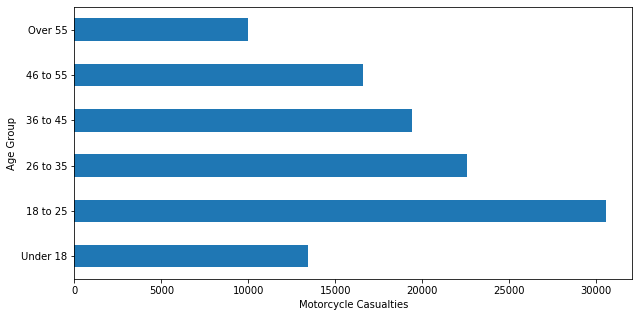

In [8]:
age_group_df.plot(kind="barh", figsize=(10,5))
ax1 = plt.axes()
ax1.yaxis.set_label_text('Age Group')
ax1.xaxis.set_label_text('Motorcycle Casualties')
plt.savefig('Images/age_grp_barh.png')

In [9]:
gender_year_df = df.groupby(["Year", "Sex_of_Casualty"])["Age_of_Casualty"].count().reset_index().rename_axis(None, axis=1)
gender_year_df.head()

,Year,Sex_of_Casualty,Age_of_Casualty
0,2010,Female,3331
1,2010,Male,18502
2,2011,Female,3349
3,2011,Male,20062
4,2012,Female,3232


In [10]:
gender = gender_year_df.pivot_table(index=["Year"], columns=["Sex_of_Casualty"], 
                          values="Age_of_Casualty").reset_index().rename_axis(None, axis=1)
gender

,Year,Female,Male
0,2010,3331,18502
1,2011,3349,20062
2,2012,3232,19040
3,2013,3093,18612
4,2014,3173,20135


C:\Users\felip\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


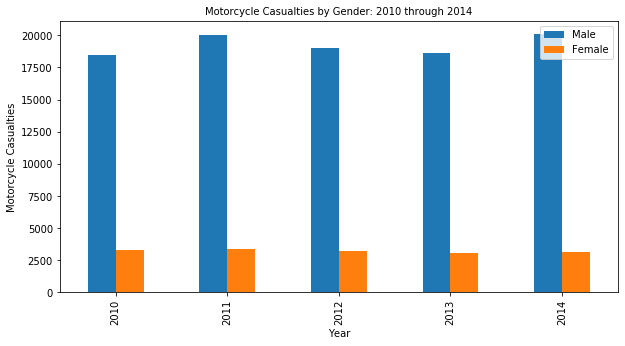

In [11]:
gender.reset_index().plot(kind='bar',x='Year', y=['Male', 'Female'],figsize=(10,5))
plt.title("Motorcycle Casualties by Gender: 2010 through 2014", fontsize=10)
ax1 = plt.axes()
ax1.yaxis.set_label_text('Motorcycle Casualties')
plt.savefig('Images/gender_bar.png')

In [12]:
# Path to SQLite file
sql_lite = "sqlite:///uk_motorcycle_accidents_sqlite.sqlite"

# Initial DB connection
engine = create_engine(sql_lite)

In [13]:
# Read DF into DB
df.to_sql(name='uk_motorcycle_accidents', con=engine, if_exists='append', index=False)

In [14]:
# Check connection of DB is working
engine.table_names()

['uk_motorcycle_accidents']

In [15]:
# Read DF into Json
df.to_json(r'uk_motorcycle_accidents.json', orient='index')

In [16]:
pd.read_sql_query('Select * from uk_motorcycle_accidents', con=engine).head()

,Accident_Index,Year,Vehicle_Type,Longitude,Latitude,Sex_of_Casualty,Age_of_Casualty,Age_Group
0,201001BS70008,2010,Motorcycle,-0.175802,51.484361,Male,28,26 to 35
1,201001BS70011,2010,Motorcycle,-0.217699,51.514321,Male,21,18 to 25
2,201001BS70016,2010,Motorcycle,-0.173157,51.485669,Male,14,Under 18
3,201001BS70020,2010,Motorcycle,-0.195276,51.494554,Male,23,18 to 25
4,201001BS70022,2010,Motorcycle,-0.185327,51.494761,Male,37,36 to 45


In [17]:
# Checking for table columns
inspector = inspect(engine)
casualty_columns = inspector.get_columns('uk_motorcycle_accidents')
for c in casualty_columns:
    print(c['name'], c["type"])

Accident_Index TEXT
Year TEXT
Vehicle_Type TEXT
Longitude FLOAT
Latitude FLOAT
Sex_of_Casualty TEXT
Age_of_Casualty BIGINT
Age_Group TEXT


In [18]:
session = Session(engine)

In [19]:
# Good example of querying the database and assigning to variable
coord = session.execute('Select Latitude, Longitude From uk_motorcycle_accidents Where Age_Group = "18 to 25" LIMIT 10').fetchall()
print(coord)

[(51.514321, -0.21769899999999998), (51.494554, -0.195276), (51.494743, -0.195845), (51.487021, -0.179153), (51.492443, -0.163523), (51.501665, -0.184044), (51.490444000000004, -0.191117), (51.499958, -0.19578299999999998), (51.484044, -0.18431199999999998), (51.502165999999995, -0.158521)]


In [20]:
session.close()